<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score
from sklearn import ensemble

In [3]:
df=pd.read_csv(r'C:\Users\kisaz\OneDrive\Рабочий стол\sber\ML\DA_2\Lec2\titanicdf.csv')

In [4]:
def welcome (df):
    '''Функция получения первичной информации о датафрейме'''
    print ('------------- Первые 5 строк ------------')
    display(df.head())
    print('')
    print('')
    print ('------------- Типы данных ------------')
    print (df.info())
    print('')
    print('')
    print ('------------- Пропуски ------------')
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
        if count == 0:
            print('Пропусков НЕТ')
    print('')
    print('')
    display(pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm'))

In [5]:
welcome(df)

------------- Первые 5 строк ------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


------------- Пропуски ------------
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Age  -  177 пропусков
Cabin  -  687 пропусков
Embarked  -  2 пропусков




,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [6]:
new_df = pd.get_dummies(data=df, columns=['Pclass', 'Sex','Embarked'])

In [7]:
tr_df=new_df.drop(['Name','Ticket','Cabin'],axis=1)

In [8]:
tr_df.dropna(inplace=True)

In [9]:
x = tr_df.drop('Age',axis=1)
y = tr_df['Age']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=666)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model_lr = LinearRegression()

In [13]:
tr_df=new_df.drop(['Name','Ticket','Cabin'],axis=1)

In [14]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [15]:
pred = model_lr.predict(X_test)

In [16]:
tr_df['Age'].fillna(pred.mean(),inplace=True)

In [17]:
x = tr_df.drop('Survived',axis=1)
y = tr_df['Survived']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(tr_df.drop('Survived',axis=1), tr_df['Survived'], test_size=0.33, random_state=42)

In [20]:
test_deep = []
for deep in range (1,31):
  for est in range (20,100):
    for leaf in range (1,5):
    # print("--------", deep, "--------", leaf)
        rc=ensemble.RandomForestClassifier(max_depth=deep,min_samples_leaf=leaf, n_estimators=est)
        model = rc.fit(X_train, y_train)
        pred1 = model.predict(X_test)
        test_deep.append([deep,leaf,est,f1_score(y_test,pred1),recall_score(y_test,pred1)])

In [21]:
test_deep = pd.DataFrame(test_deep)
test_deep.columns = ['tree_depth','leaf','n_estimators','f1_score','recall_score']
# test_deep.sort_values(by='f1_score',ascending=False).head()

In [22]:
test_deep.sort_values(by='f1_score',ascending=False).head(10)

,tree_depth,leaf,n_estimators,f1_score,recall_score
9493,30,2,73,0.788991,0.716667
5769,19,2,22,0.787330,0.725000
6406,21,3,21,0.785388,0.716667
5496,18,1,34,0.783410,0.708333
6172,20,1,43,0.781818,0.716667
8961,29,2,20,0.781818,0.716667
8460,27,1,55,0.779817,0.708333
4204,14,1,31,0.779817,0.708333
3960,13,1,50,0.778281,0.716667
4820,16,1,25,0.778281,0.716667


In [23]:
from sklearn import ensemble
rc=ensemble.RandomForestClassifier(max_depth=30,n_estimators=73,min_samples_leaf=2,criterion="entropy")
#rc=ensemble.RandomForestClassifier()


In [24]:
model = rc.fit(X_train, y_train)
pred1 = model.predict(X_test)

In [25]:
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')

In [26]:
scores.mean()

0.6554318994125621

In [27]:

print('Precision:',precision_score(y_test,pred1))
print('Recall:',recall_score(y_test,pred1))
print('F1:',f1_score(y_test,pred1))


Precision: 0.8297872340425532
Recall: 0.65
F1: 0.7289719626168223


In [28]:
prob=model.predict_proba(X_test)[:,1]

In [29]:
fpr, tpr, treshold = roc_curve(y_test, prob)
tree_auc = roc_auc_score(y_test, prob)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.879


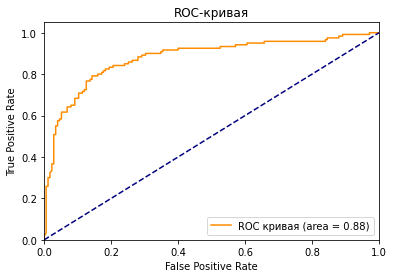

In [31]:
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()